<a href="https://colab.research.google.com/github/PyChef1/METODOS-NUMERICOS/blob/main/InterpolaciondeLagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Interpolacion de Lagrange
La \textbf{interpolación de Lagrange} es un método para encontrar un polinomio único (llamado \textit{polinomio interpolador}) que pase exactamente por un conjunto dado de puntos \((x_0, y_0), (x_1, y_1), \dots, (x_n, y_n)\), donde todas las \(x_i\) son distintas.

\section{Fórmula del Polinomio de Lagrange}
El polinomio interpolador \(P(x)\) se expresa como:
$$
P(x) = \sum_{i=0}^{n} y_i \cdot L_i(x),
$$
donde \(L_i(x)\) son los \textbf{polinomios de Lagrange}, definidos por:
$$
L_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^{n} \frac{x - x_j}{x_i - x_j}.
$$


Digite (x,y). Escriba 'fin' cuando termine.
Digite el punto (x y): 1 7
Digite el punto (x y): 2 5
Digite el punto (x y): 8 0
Digite el punto (x y): fin

polinomio de Lagrange:
                   2                           
0.166666666666667⋅x  - 2.5⋅x + 9.33333333333333


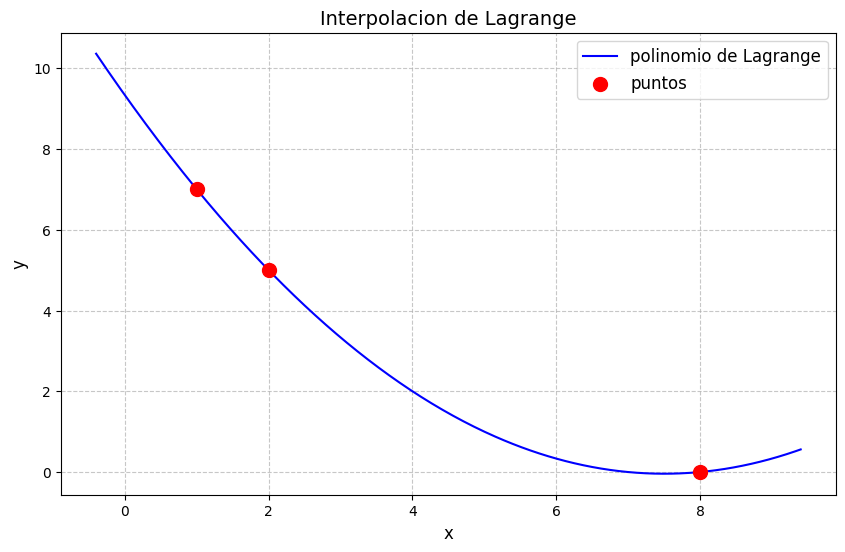

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def obtener_puntos():
    puntos = []
    print("Digite (x,y). Escriba 'fin' cuando termine.")

    while True:
        entrada = input("Digite el punto (x y): ").strip() #ingresa los puntos
        if entrada.lower() == 'fin': #finaliza el proceso
            if len(puntos) < 2:
                print("Necesita al menos 2 puntos.") # "Error" al no tener dos puntos
                continue
            break

        try:
            x, y = map(float, entrada.split()) #Aloja los valores de x y y en memoria y los guarda en la lista puntos
            puntos.append((x, y))
        except ValueError: #Mensaje de error por esxribir otra cosa
            print("Entrada invalida. Solo digite 2 valores separados por un espacio.")

    return puntos

def polinomio_de_lagrange(puntos):
    x = sp.Symbol('x')
    n = len(puntos)
    poli = 0
    #Calcular L_i(x)
    for i in range(n):
        xi, yi = puntos[i]
        termino = yi
        for j in range(n):
            if j != i:
                xj = puntos[j][0]
                termino *= (x - xj) / (xi - xj)
        poli += termino

    return sp.simplify(poli)

def grafica(puntos, poli_expr):

    x = sp.Symbol('x')
    x_min = min(p[0] for p in puntos)
    x_max = max(p[0] for p in puntos)
    x_range = x_max - x_min
    x_vals = np.linspace(x_min - 0.2*x_range, x_max + 0.2*x_range, 400)
    y_vals = [poli_expr.subs(x, val) for val in x_vals]

    plt.figure(figsize=(10, 6))

    plt.plot(x_vals, y_vals, label='polinomio de Lagrange', color='blue')

    x_puntos = [p[0] for p in puntos]
    y_puntos = [p[1] for p in puntos]
    plt.scatter(x_puntos, y_puntos, color='red', s=100, label='puntos', zorder=5)

    plt.title('Interpolacion de Lagrange', fontsize=14)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)

    plt.show()

def main():

    puntos = obtener_puntos()

    poli = polinomio_de_lagrange(puntos)

    print("\npolinomio de Lagrange:")
    sp.pprint(poli)

    grafica(puntos, poli)

if __name__ == "__main__":
    main()